# **Initial setup**

In [1]:
!pip install Ultralytics
!pip install gdown

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 98.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 100.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [2]:
# Download Dataset
!gdown --id 1q3w__zGz5uQm-ELhfUUBC41NjfaiElss

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1q3w__zGz5uQm-ELhfUUBC41NjfaiElss
From (redirected): https://drive.google.com/uc?id=1q3w__zGz5uQm-ELhfUUBC41NjfaiElss&confirm=t&uuid=9c31c6b3-43d6-4e20-b063-b002457a42ab
To: /content/datasets.zip
100% 2.85G/2.85G [00:26<00:00, 109MB/s]


In [3]:
# Unzip Dataset
!unzip -q datasets.zip -d "/content/"

# Imports

In [4]:
#Imports
import os
import cv2
import yaml
import shutil
import numpy as np
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from pathlib import Path
from ultralytics import YOLO
from IPython.display import display, Image


print("Libraries imported.")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Libraries imported.


In [5]:
# Function to load dataset configuration


def load_dataset_config(dataset_path):
    """
    Loads the data.yaml file from a dataset folder.

    Args:
        dataset_path (str or Path): The path to the root of the dataset


    Returns:
        dict: The parsed content of the data.yaml file, or None if an error occurs.
    """
    data_yaml_path = Path(dataset_path) / 'data.yaml'

    if not data_yaml_path.is_file():
        return None

    try:
        with open(data_yaml_path, 'r') as f:
            config = yaml.safe_load(f)

        dataset_root = data_yaml_path.parent
        # Correct relative paths to be absolute for the Colab environment
        for key in ['train', 'val', 'test']:
            if key in config and config[key]:
                path_in_yaml = Path(config[key])
                if not path_in_yaml.is_absolute():
                    absolute_path = (dataset_root / path_in_yaml).resolve()
                    config[key] = str(absolute_path)

        return config

    except Exception as e:
        print(f"An unexpected error occurred while loading {data_yaml_path}: {e}")
        return None

print("Configuration loading function is defined.")

Configuration loading function is defined.


In [6]:
#Define project paths and load both dataset specfic configurations for Google Colab

PROJECT_ROOT = Path('/content')
DATASETS_DIR = PROJECT_ROOT / 'datasets'
print(f"Project Root set to: {PROJECT_ROOT}")
print(f"Datasets Directory: {DATASETS_DIR}")

# --- Load Object Detection Dataset ---
objects_dataset_path = DATASETS_DIR / 'baseball_rubber_home_glove'
print(f"\n--- Loading Objects Dataset from {objects_dataset_path} ---")
objects_config = load_dataset_config(objects_dataset_path)
if objects_config:
    print("Objects dataset configuration loaded successfully!")
else:
    print(f"ERROR: Could not load 'data.yaml' from: {objects_dataset_path}")

# --- Load PHC (Player) Detection Dataset ---
phc_dataset_path = DATASETS_DIR / 'phc'
print(f"\n--- Loading PHC Dataset from {phc_dataset_path} ---")
phc_config = load_dataset_config(phc_dataset_path)
if phc_config:
    print("PHC (player) dataset configuration loaded successfully!")
else:
    print(f"ERROR: Could not load 'data.yaml' from: {phc_dataset_path}")

Project Root set to: /content
Datasets Directory: /content/datasets

--- Loading Objects Dataset from /content/datasets/baseball_rubber_home_glove ---
Objects dataset configuration loaded successfully!

--- Loading PHC Dataset from /content/datasets/phc ---
PHC (player) dataset configuration loaded successfully!


In [7]:
# Create Corrected `data.yaml` for Object (Plate) Detection

print("\n--- Creating Corrected `data.yaml` for Object Detection Model ---")
colab_objects_yaml_path = None
if objects_config:
    colab_objects_yaml_path = PROJECT_ROOT / 'colab_objects_data.yaml'

    val_path = objects_dataset_path / 'val'
    valid_path = objects_dataset_path / 'valid'
    validation_dir_name = 'valid' if valid_path.exists() else 'val'


    objects_colab_data = {
        'train': str((objects_dataset_path / 'train' / 'images').resolve()),
        'val': str((objects_dataset_path / validation_dir_name / 'images').resolve()),
        'test': str((objects_dataset_path / 'test' / 'images').resolve()),
        'nc': objects_config.get('nc', 4),
        'names': objects_config.get('names', ['glove', 'homeplate', 'baseball', 'rubber'])
    }

    with open(colab_objects_yaml_path, 'w') as f:
        yaml.dump(objects_colab_data, f, sort_keys=False, default_flow_style=False)
    print(f"Data.yaml file created at: {colab_objects_yaml_path}")
else:
    print("Data.yaml not created")




# Create Corrected `data.yaml` for Player (Hitter) Detection
print("\n--- Creating Corrected `data.yaml` for Player (Hitter) Detection Model ---")
colab_phc_yaml_path = None
if phc_config:
    colab_phc_yaml_path = PROJECT_ROOT / 'colab_phc_data.yaml'

    phc_val_path = phc_dataset_path / 'val'
    phc_valid_path = phc_dataset_path / 'valid'
    phc_validation_dir_name = 'valid' if phc_valid_path.exists() else 'val'

    phc_colab_data = {
        'train': str((phc_dataset_path / 'train' / 'images').resolve()),
        'val': str((phc_dataset_path / phc_validation_dir_name / 'images').resolve()),
        'test': str((phc_dataset_path / 'test' / 'images').resolve()),
        'nc': phc_config.get('nc', 3),
        'names': phc_config.get('names', ['hitter', 'pitcher', 'catcher'])
    }

    with open(colab_phc_yaml_path, 'w') as f:
        yaml.dump(phc_colab_data, f, sort_keys=False, default_flow_style=False)
    print(f"Data.yaml file created at:{colab_phc_yaml_path}")
else:
    print("Data.yaml not created")



--- Creating Corrected `data.yaml` for Object Detection Model ---
Data.yaml file created at: /content/colab_objects_data.yaml

--- Creating Corrected `data.yaml` for Player (Hitter) Detection Model ---
Data.yaml file created at:/content/colab_phc_data.yaml


# **Models section**

***Plate Detection Model with YOLOv9***

In [9]:
# Object (Plate) Detection Model with YOLOv9
print("\n--- Fine-tuning Object (Plate) Detection Model with YOLOv9 ---")
plate_detector_model = None
if colab_objects_yaml_path and colab_objects_yaml_path.exists():
    model = YOLO('yolov9c.pt')
    model.train(
        data=str(colab_objects_yaml_path),
        epochs= 20,
        workers=2,
        imgsz=640,
        project=str(PROJECT_ROOT / 'runs' / 'detect'),
        name='plate_train_v9',
        exist_ok=True
    )
    best_model_path = PROJECT_ROOT / 'runs' / 'detect' / 'plate_train_v9' / 'weights' / 'best.pt'
    if best_model_path.exists():
        print(f"Loading best trained plate detector model from: {best_model_path}")
        plate_detector_model = YOLO(best_model_path)
    else:
        print(f"Could not find trained plate detector model.")
else:
    print("Corrected objects config file not found. Skipping training.")


--- Fine-tuning Object (Plate) Detection Model with YOLOv9 ---
Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/colab_objects_data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov9c.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=plate_train_v9, nbs=64, nms=False, opset=None, optimize=False, optimizer=

train: Scanning /content/datasets/baseball_rubber_home_glove/train/labels.cache... 3905 images, 20 backgrounds, 142 corrupt: 100%|██████████| 3925/3925 [00:00<?, ?it/s]

train: /content/datasets/baseball_rubber_home_glove/train/images/0000022.jpg: ignoring corrupt image/label: Label class 4 exceeds dataset class count 4. Possible class labels are 0-3
train: /content/datasets/baseball_rubber_home_glove/train/images/0000045.jpg: ignoring corrupt image/label: Label class 4 exceeds dataset class count 4. Possible class labels are 0-3
train: /content/datasets/baseball_rubber_home_glove/train/images/0000084.jpg: ignoring corrupt image/label: Label class 4 exceeds dataset class count 4. Possible class labels are 0-3
train: /content/datasets/baseball_rubber_home_glove/train/images/0000138.jpg: ignoring corrupt image/label: Label class 4 exceeds dataset class count 4. Possible class labels are 0-3
train: /content/datasets/baseball_rubber_home_glove/train/images/0000251.jpg: ignoring corrupt image/label: Label class 4 exceeds dataset class count 4. Possible class labels are 0-3
train: /content/datasets/baseball_rubber_home_glove/train/images/0000261.jpg: ignorin

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1485.5±1408.5 MB/s, size: 337.6 KB)


val: Scanning /content/datasets/baseball_rubber_home_glove/valid/labels.cache... 97 images, 1 backgrounds, 6 corrupt: 100%|██████████| 98/98 [00:00<?, ?it/s]

val: /content/datasets/baseball_rubber_home_glove/valid/images/0001638.jpg: ignoring corrupt image/label: Label class 4 exceeds dataset class count 4. Possible class labels are 0-3
val: /content/datasets/baseball_rubber_home_glove/valid/images/0002723.jpg: ignoring corrupt image/label: Label class 4 exceeds dataset class count 4. Possible class labels are 0-3
val: /content/datasets/baseball_rubber_home_glove/valid/images/0004582.jpg: ignoring corrupt image/label: Label class 4 exceeds dataset class count 4. Possible class labels are 0-3
val: /content/datasets/baseball_rubber_home_glove/valid/images/0004829.jpg: ignoring corrupt image/label: Label class 4 exceeds dataset class count 4. Possible class labels are 0-3
val: /content/datasets/baseball_rubber_home_glove/valid/images/0007983.jpg: ignoring corrupt image/label: Label class 4 exceeds dataset class count 4. Possible class labels are 0-3
val: /content/datasets/baseball_rubber_home_glove/valid/images/0008165.jpg: ignoring corrupt im

Plotting labels to /content/runs/detect/plate_train_v9/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/runs/detect/plate_train_v9
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      10.4G      2.324       2.21      1.037         35        640: 100%|██████████| 237/237 [00:53<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all         92        350      0.617      0.671      0.631      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      10.4G      2.246      1.273     0.9999         48        640: 100%|██████████| 237/237 [00:49<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.11it/s]

                   all         92        350      0.637       0.67      0.628      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      10.9G      2.195      1.226     0.9848         61        640: 100%|██████████| 237/237 [00:47<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.29it/s]

                   all         92        350      0.675      0.697      0.678      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      10.9G      2.157      1.193     0.9751         61        640: 100%|██████████| 237/237 [00:46<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         92        350      0.641      0.784      0.728      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      10.9G      2.106      1.143     0.9639         25        640: 100%|██████████| 237/237 [00:46<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.31it/s]

                   all         92        350      0.778      0.787      0.815      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      10.9G      2.071      1.123     0.9552         29        640: 100%|██████████| 237/237 [00:46<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.24it/s]

                   all         92        350       0.71      0.804      0.792      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      10.9G      2.051      1.102     0.9515         67        640: 100%|██████████| 237/237 [00:47<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.25it/s]

                   all         92        350      0.707      0.788      0.733      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20        11G      2.012      1.071     0.9428         62        640: 100%|██████████| 237/237 [00:46<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.24it/s]

                   all         92        350      0.779      0.805      0.797      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20        11G      1.982      1.063      0.939         37        640: 100%|██████████| 237/237 [00:47<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.89it/s]

                   all         92        350      0.793      0.804      0.814      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20        11G      1.962      1.041     0.9374         39        640: 100%|██████████| 237/237 [00:47<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.11it/s]

                   all         92        350      0.806      0.816      0.814      0.336


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20        11G      1.927       1.05      0.963         26        640: 100%|██████████| 237/237 [00:47<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.90it/s]

                   all         92        350      0.749      0.817      0.798      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20        11G      1.911      1.027     0.9652         27        640: 100%|██████████| 237/237 [00:46<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.28it/s]

                   all         92        350      0.813      0.807      0.828      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20        11G      1.893      1.017     0.9556         27        640: 100%|██████████| 237/237 [00:47<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.27it/s]

                   all         92        350      0.776      0.832      0.829      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20        11G      1.858      1.009     0.9512         28        640: 100%|██████████| 237/237 [00:46<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.10it/s]

                   all         92        350      0.787      0.833      0.853      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20        11G      1.851     0.9973     0.9445         27        640: 100%|██████████| 237/237 [00:46<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.15it/s]

                   all         92        350      0.806      0.843      0.841      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20        11G       1.83     0.9807     0.9383         26        640: 100%|██████████| 237/237 [00:47<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.31it/s]

                   all         92        350      0.777      0.839      0.811      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20        11G      1.812     0.9733     0.9406         25        640: 100%|██████████| 237/237 [00:46<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.13it/s]

                   all         92        350      0.771      0.841       0.83      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20        11G      1.789     0.9542      0.939         28        640: 100%|██████████| 237/237 [00:47<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.22it/s]

                   all         92        350      0.771      0.852      0.825      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20        11G       1.77     0.9523     0.9307         25        640: 100%|██████████| 237/237 [00:46<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.05it/s]

                   all         92        350      0.774      0.858      0.819      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20        11G       1.75     0.9368      0.924         28        640: 100%|██████████| 237/237 [00:47<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.18it/s]

                   all         92        350      0.796      0.869      0.861      0.381



20 epochs completed in 0.273 hours.
Optimizer stripped from /content/runs/detect/plate_train_v9/weights/last.pt, 51.6MB
Optimizer stripped from /content/runs/detect/plate_train_v9/weights/best.pt, 51.6MB

Validating /content/runs/detect/plate_train_v9/weights/best.pt...
Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLOv9c summary (fused): 156 layers, 25,322,332 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]


                   all         92        350      0.796      0.869      0.862      0.381
                 glove         90         90      0.891      0.905      0.922      0.456
             homeplate         87         87      0.669      0.897      0.788      0.351
              baseball         91         91       0.93      0.882      0.936      0.413
                rubber         82         82      0.695      0.793      0.801      0.306
Speed: 0.1ms preprocess, 2.3ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /content/runs/detect/plate_train_v9
Loading best trained plate detector model from: /content/runs/detect/plate_train_v9/weights/best.pt


***Player (Hitter) Detection Model with YOLOv9***

In [10]:
# Fine-tune the Player (Hitter) Detection Model with YOLOv9
print("\n--- Fine-tuning Player (Hitter) Detection Model with YOLOv9 ---")
hitter_detector_model = None
if colab_phc_yaml_path and colab_phc_yaml_path.exists():
    model = YOLO('yolov9c.pt') # UPDATE: Using YOLOv9
    model.train(
        task='detect',
        data=str(colab_phc_yaml_path),
        epochs=20,
        workers=2,
        imgsz=640,
        project=str(PROJECT_ROOT / 'runs' / 'detect'),
        name='hitter_train_v9',
        exist_ok=True
    )
    best_model_path = PROJECT_ROOT / 'runs' / 'detect' / 'hitter_train_v9' / 'weights' / 'best.pt'
    if best_model_path.exists():
        print(f"Loading best trained hitter detector model from: {best_model_path}")
        hitter_detector_model = YOLO(best_model_path)
    else:
        print(f"Could not find trained hitter detector model.")
else:
    print("Corrected PHC config file not found. Skipping training.")



--- Fine-tuning Player (Hitter) Detection Model with YOLOv9 ---
Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/colab_phc_data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov9c.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=hitter_train_v9, nbs=64, nms=False, opset=None, optimize=False, optimizer=au

train: Scanning /content/datasets/phc/train/labels... 3272 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3272/3272 [00:02<00:00, 1525.30it/s]

train: New cache created: /content/datasets/phc/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 806.7±26.8 MB/s, size: 327.1 KB)


val: Scanning /content/datasets/phc/val/labels... 409 images, 0 backgrounds, 0 corrupt: 100%|██████████| 409/409 [00:00<00:00, 1386.79it/s]


val: New cache created: /content/datasets/phc/val/labels.cache
Plotting labels to /content/runs/detect/hitter_train_v9/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/runs/detect/hitter_train_v9
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      10.8G      1.022     0.7537      1.133         44        640: 100%|██████████| 205/205 [00:46<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.82it/s]

                   all        409       1225      0.985      0.987      0.993      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      10.8G      1.001     0.5333      1.151         39        640: 100%|██████████| 205/205 [00:42<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.98it/s]

                   all        409       1225       0.97      0.977      0.987      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      10.8G     0.9851     0.5026      1.144         41        640: 100%|██████████| 205/205 [00:41<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.99it/s]

                   all        409       1225      0.972      0.991      0.992      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      10.9G     0.9661      0.472      1.131         55        640: 100%|██████████| 205/205 [00:40<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  6.00it/s]

                   all        409       1225      0.991       0.99      0.994      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20        11G     0.9456     0.4451      1.132         39        640: 100%|██████████| 205/205 [00:41<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.99it/s]

                   all        409       1225      0.994      0.993      0.994      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20        11G     0.9205     0.4213      1.107         43        640: 100%|██████████| 205/205 [00:40<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.87it/s]

                   all        409       1225      0.991      0.995      0.994      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20        11G     0.8997      0.408      1.104         38        640: 100%|██████████| 205/205 [00:40<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.91it/s]

                   all        409       1225      0.996      0.998      0.994      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20        11G     0.8929     0.3999      1.098         39        640: 100%|██████████| 205/205 [00:40<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  6.00it/s]

                   all        409       1225      0.997      0.998      0.994      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20        11G     0.8778     0.3846      1.084         54        640: 100%|██████████| 205/205 [00:40<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  6.07it/s]

                   all        409       1225      0.995      0.997      0.994      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20        11G     0.8636      0.371      1.079         39        640: 100%|██████████| 205/205 [00:40<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  6.06it/s]

                   all        409       1225      0.998      0.996      0.994      0.796


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20        11G     0.8377     0.3286      1.065         24        640: 100%|██████████| 205/205 [00:41<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.99it/s]

                   all        409       1225      0.997      0.998      0.994      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20        11G     0.8375     0.3251      1.054         24        640: 100%|██████████| 205/205 [00:40<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  6.01it/s]

                   all        409       1225      0.995      0.998      0.995      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20        11G     0.8175     0.3183      1.066         24        640: 100%|██████████| 205/205 [00:40<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.97it/s]

                   all        409       1225      0.997      0.998      0.994      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20        11G     0.8093     0.3073      1.065         24        640: 100%|██████████| 205/205 [00:40<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.96it/s]

                   all        409       1225      0.997      0.998      0.994      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20        11G     0.7987     0.2991      1.054         24        640: 100%|██████████| 205/205 [00:40<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.99it/s]

                   all        409       1225      0.997      0.998      0.994      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20        11G     0.7868     0.2894      1.033         24        640: 100%|██████████| 205/205 [00:41<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.97it/s]

                   all        409       1225      0.998      0.998      0.994      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20        11G     0.7828     0.2846      1.037         24        640: 100%|██████████| 205/205 [00:40<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.90it/s]

                   all        409       1225      0.998      0.999      0.994      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20        11G     0.7692     0.2758      1.029         24        640: 100%|██████████| 205/205 [00:40<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  6.04it/s]

                   all        409       1225      0.998      0.998      0.994      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20        11G     0.7631     0.2679      1.014         24        640: 100%|██████████| 205/205 [00:41<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  6.01it/s]

                   all        409       1225      0.998      0.998      0.994      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20        11G     0.7511     0.2614       1.01         24        640: 100%|██████████| 205/205 [00:40<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.97it/s]

                   all        409       1225      0.998      0.998      0.994      0.822



20 epochs completed in 0.247 hours.
Optimizer stripped from /content/runs/detect/hitter_train_v9/weights/last.pt, 51.6MB
Optimizer stripped from /content/runs/detect/hitter_train_v9/weights/best.pt, 51.6MB

Validating /content/runs/detect/hitter_train_v9/weights/best.pt...
Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLOv9c summary (fused): 156 layers, 25,321,561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.59it/s]


                   all        409       1225      0.998      0.998      0.994      0.824
                hitter        407        407      0.995      0.997      0.992      0.796
               pitcher        409        409          1          1      0.995       0.86
               catcher        409        409      0.999      0.998      0.995      0.817
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to /content/runs/detect/hitter_train_v9
Loading best trained hitter detector model from: /content/runs/detect/hitter_train_v9/weights/best.pt



--- Running Final Validation with Multi-Model Pipeline ---


100%|██████████| 6.52M/6.52M [00:00<00:00, 75.2MB/s]



--- Pre-Check ---
Plate Detector Model Loaded: PLATE DETECTOR READY
Hitter Detector Model Loaded: HITTER DETECTOR READY
Validation Images Found: FOUND (20 images)
------------------------


--- Processing: 0004544.jpg ---
Home plate NOT DETECTED by plate model.

--- Processing: 0003278.jpg ---
Home plate DETECTED.
✅ 'Hitter' class DETECTED by hitter model.
Pose estimated for detected hitter.
Drawing strike zone.
Baseball DETECTED.


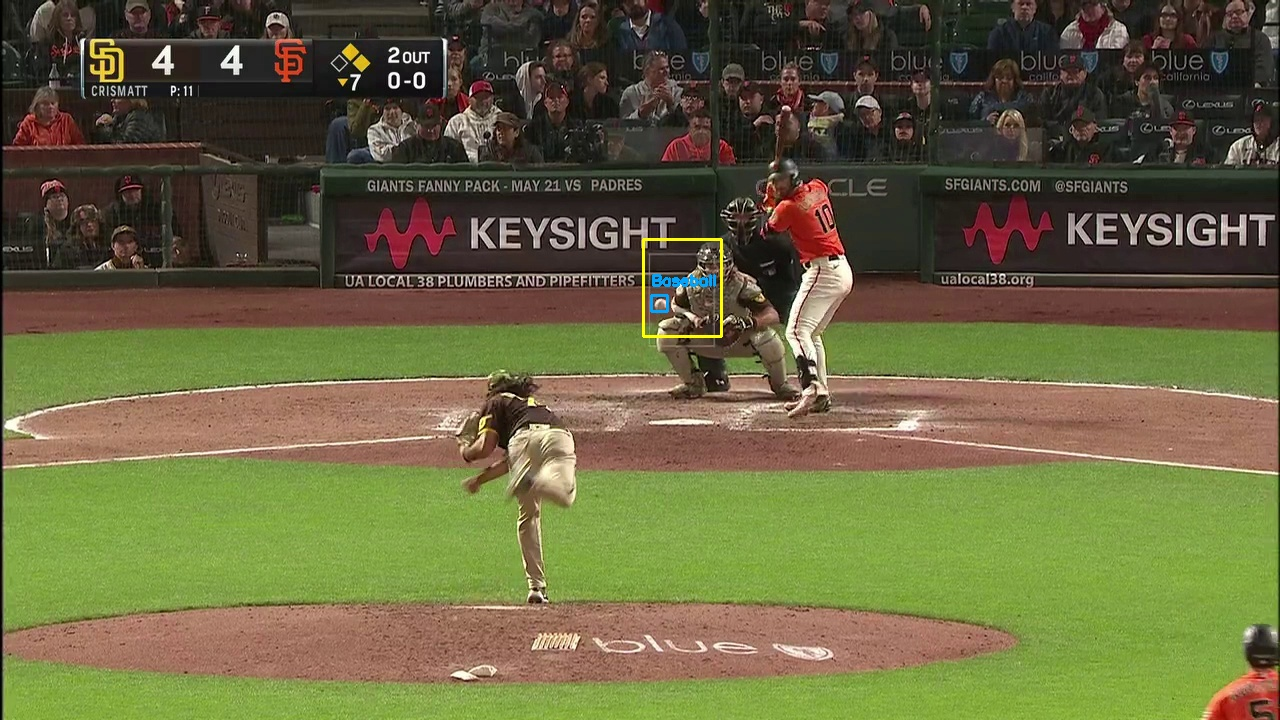


--- Processing: 0000386.jpg ---
Home plate DETECTED.
✅ 'Hitter' class DETECTED by hitter model.
Pose estimated for detected hitter.
Drawing strike zone.
Baseball DETECTED.


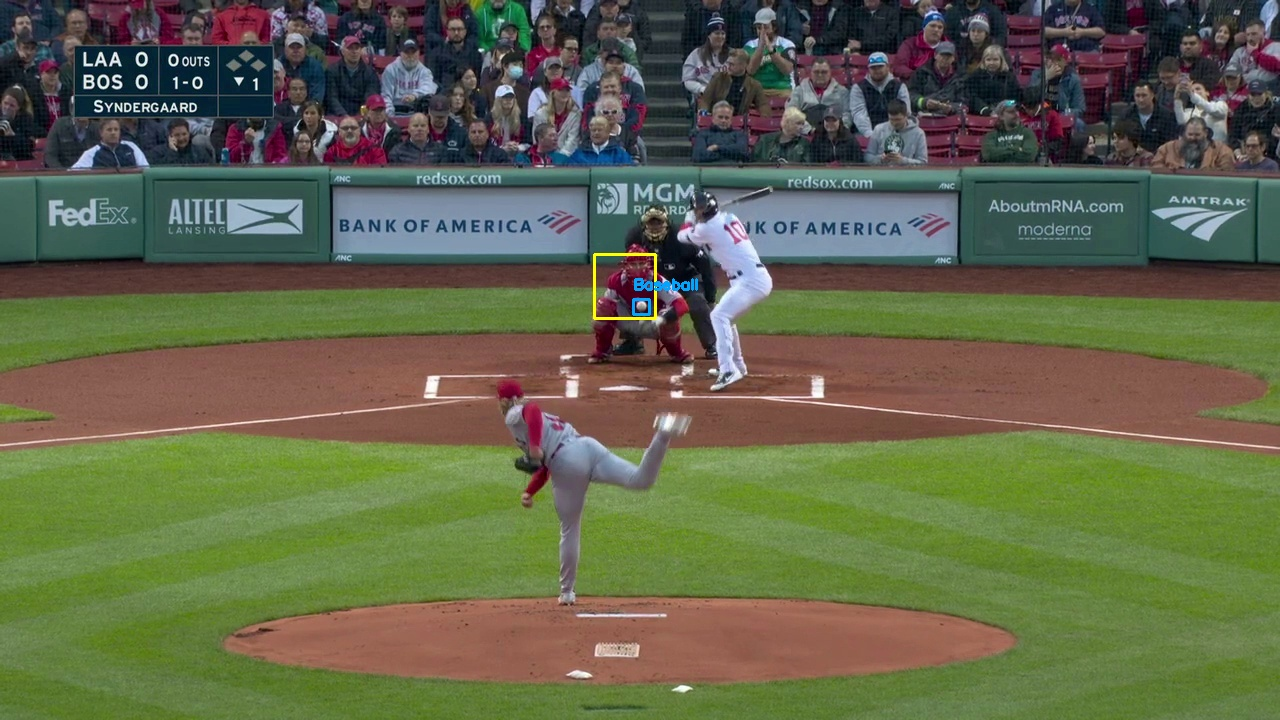


--- Processing: 0009997.jpg ---
Home plate DETECTED.
✅ 'Hitter' class DETECTED by hitter model.
Pose estimated for detected hitter.
Drawing strike zone.
Baseball DETECTED.


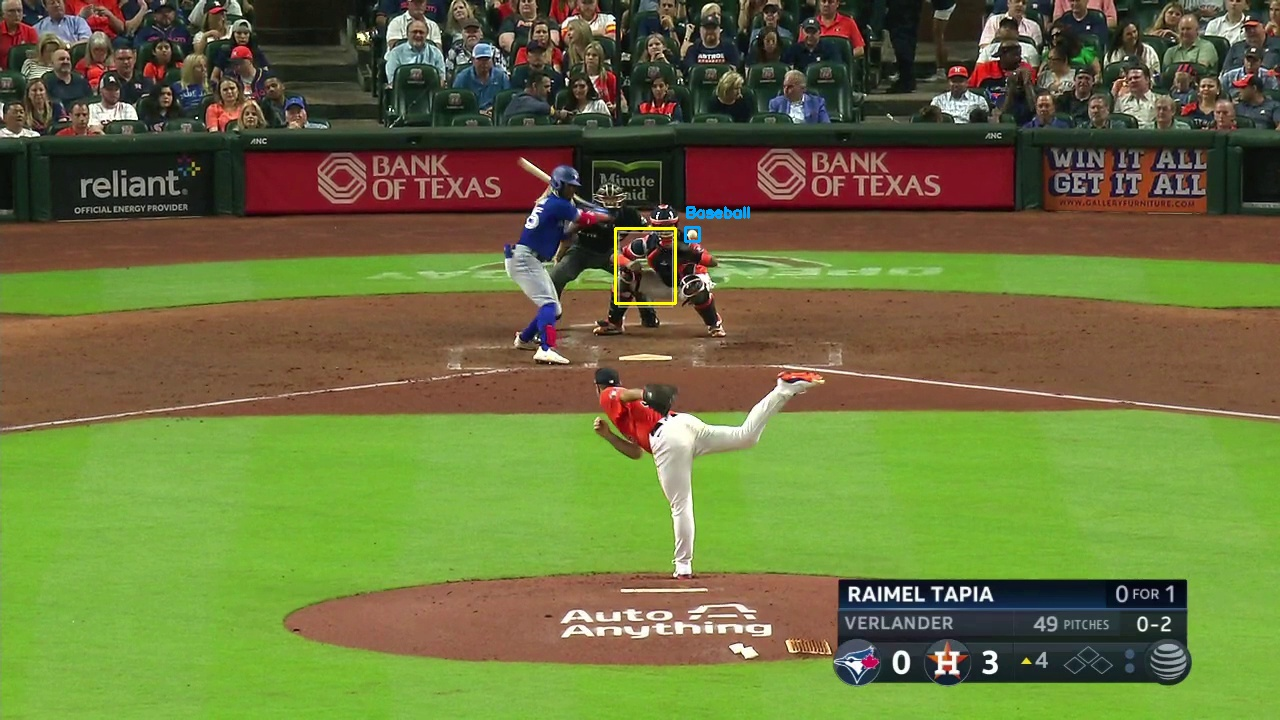


--- Processing: 0003618.jpg ---
Home plate NOT DETECTED by plate model.

--- Processing: 0008584.jpg ---
Home plate DETECTED.
✅ 'Hitter' class DETECTED by hitter model.
Pose estimated for detected hitter.
Drawing strike zone.
Baseball DETECTED.


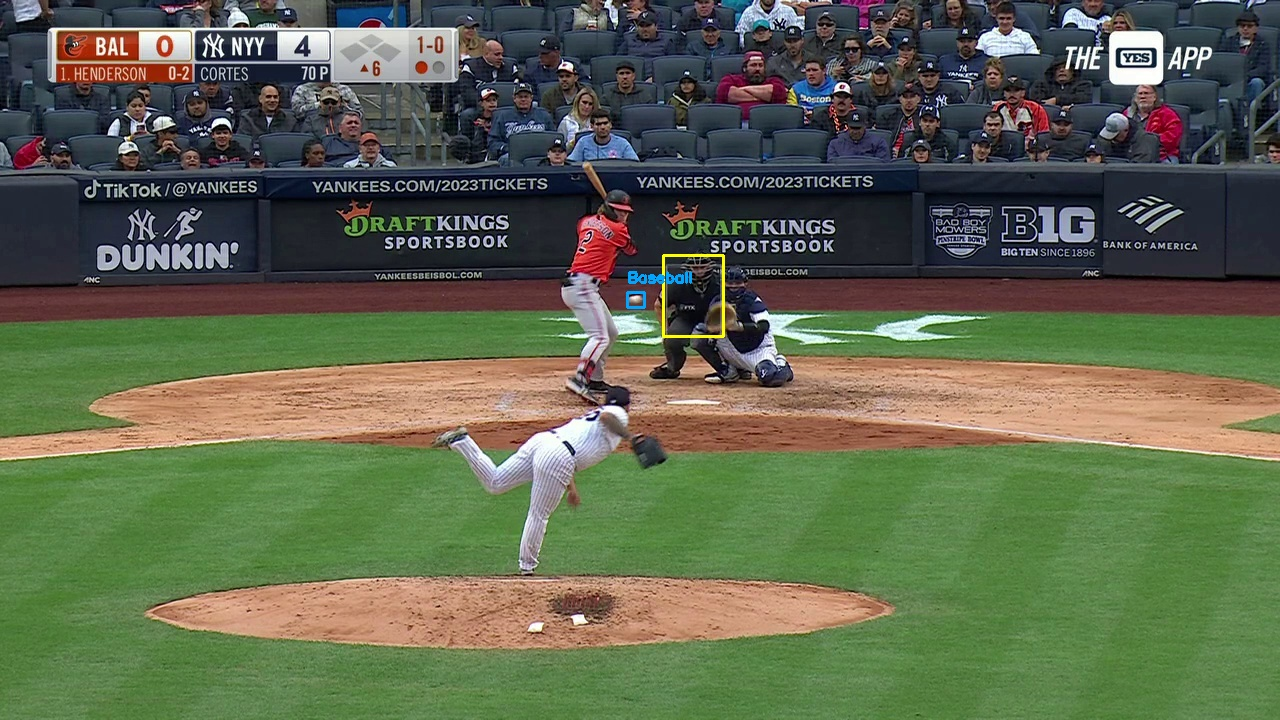


--- Processing: 0002238.jpg ---
Home plate DETECTED.
✅ 'Hitter' class DETECTED by hitter model.
Pose estimated for detected hitter.
Drawing strike zone.
Baseball DETECTED.


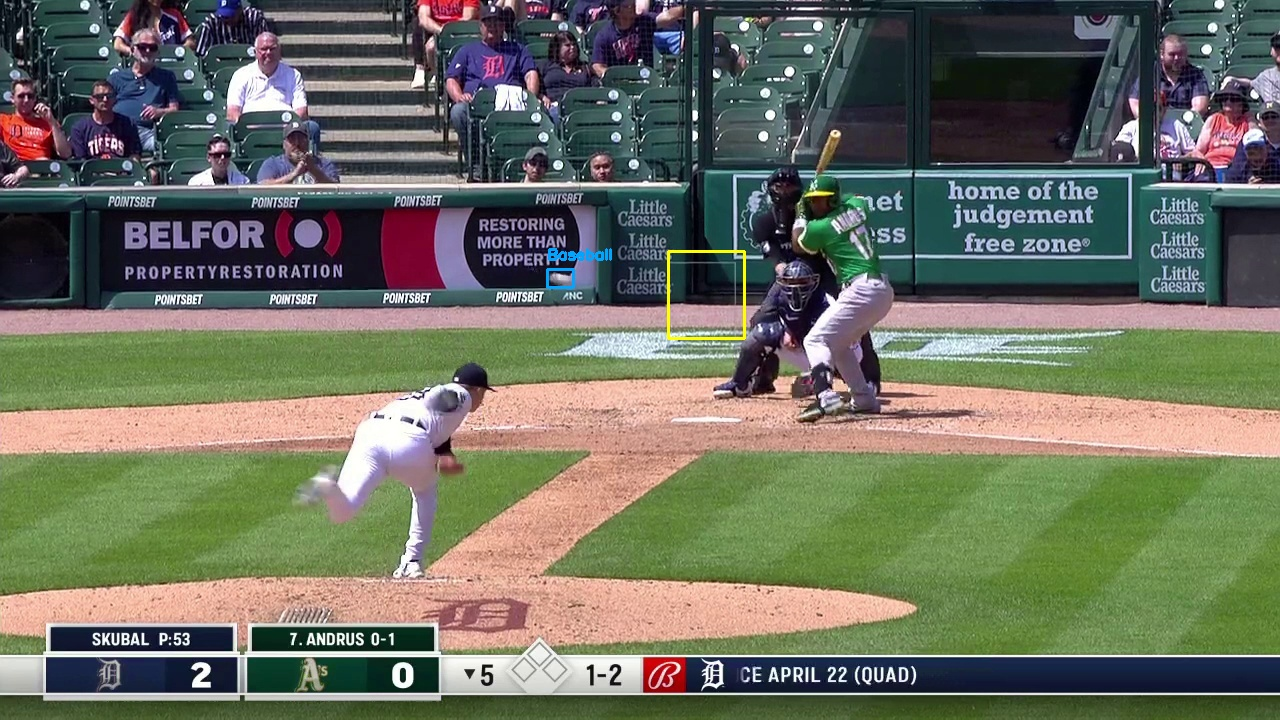


--- Processing: 0009074.jpg ---
Home plate DETECTED.
✅ 'Hitter' class DETECTED by hitter model.
Pose estimated for detected hitter.
Drawing strike zone.
Baseball DETECTED.


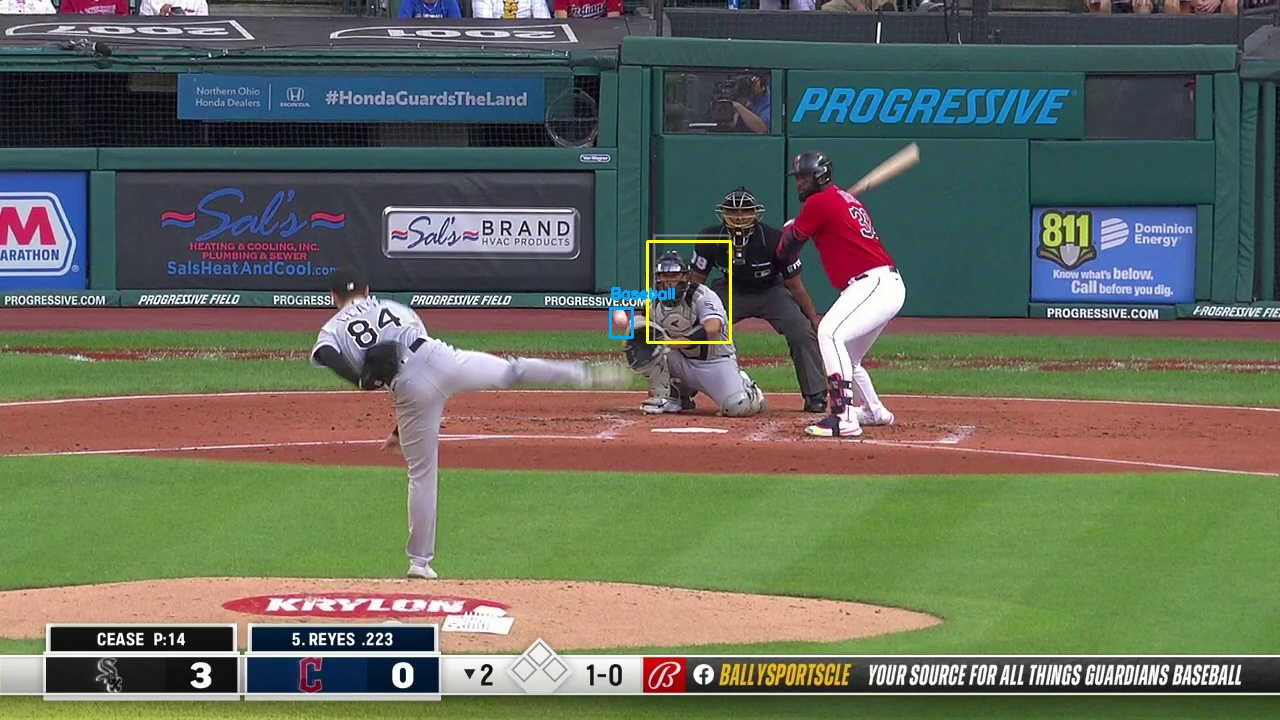


--- Processing: 0005507.jpg ---
Home plate DETECTED.
✅ 'Hitter' class DETECTED by hitter model.
Pose estimated for detected hitter.
Drawing strike zone.
Baseball DETECTED.


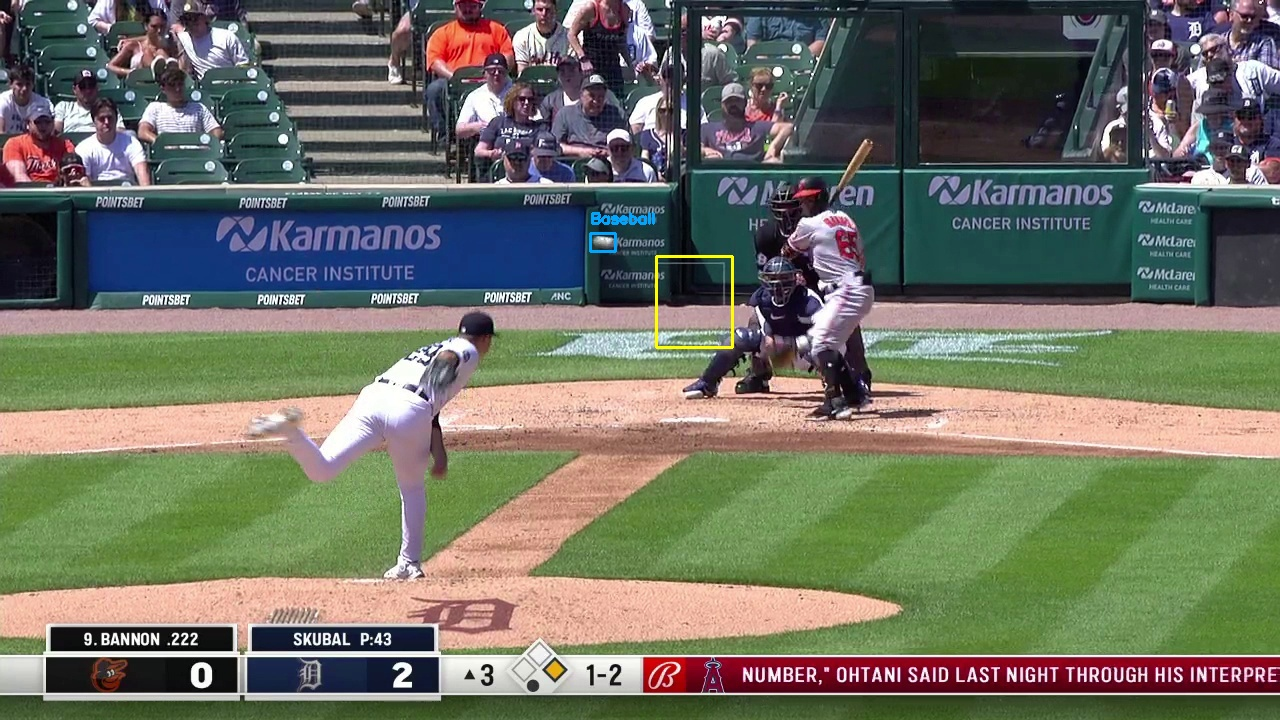


--- Processing: 0004911.jpg ---
Home plate NOT DETECTED by plate model.

--- Processing: 0006007.jpg ---
Home plate DETECTED.
✅ 'Hitter' class DETECTED by hitter model.
Pose estimated for detected hitter.
Drawing strike zone.
Baseball DETECTED.


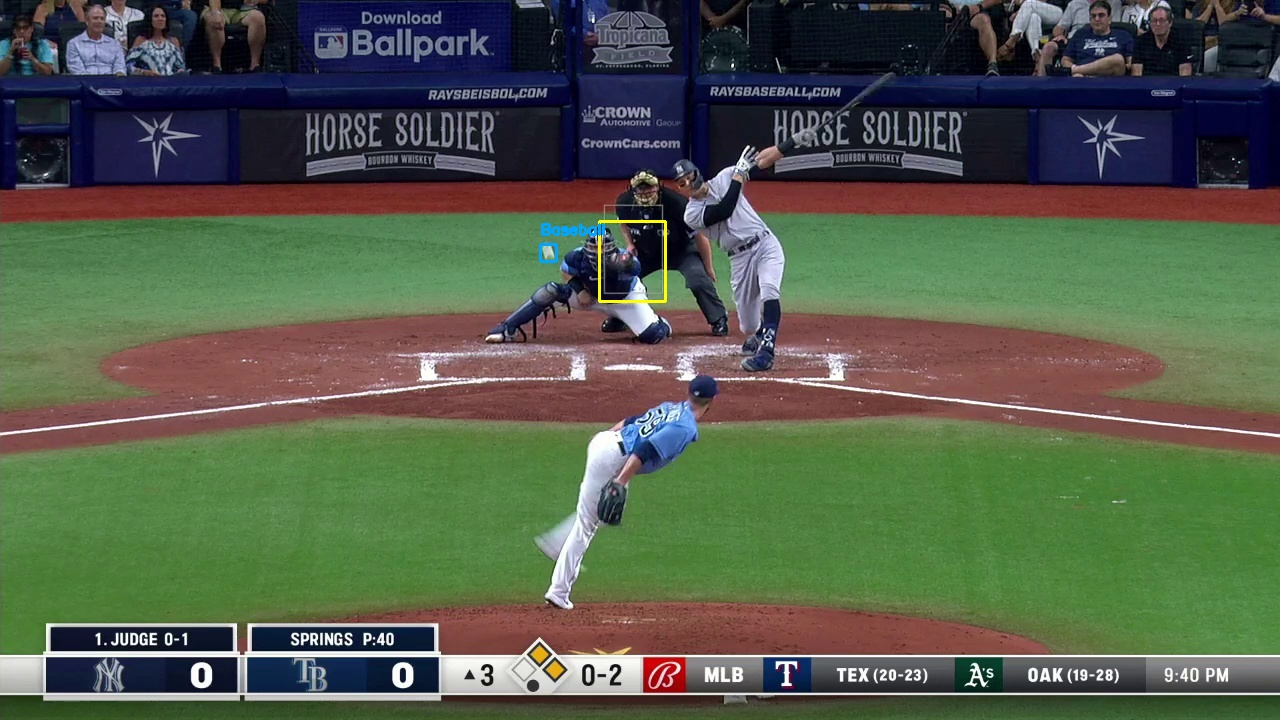


--- Processing: 0004653.jpg ---
Home plate DETECTED.
✅ 'Hitter' class DETECTED by hitter model.
Pose estimated for detected hitter.
Drawing strike zone.
Baseball DETECTED.


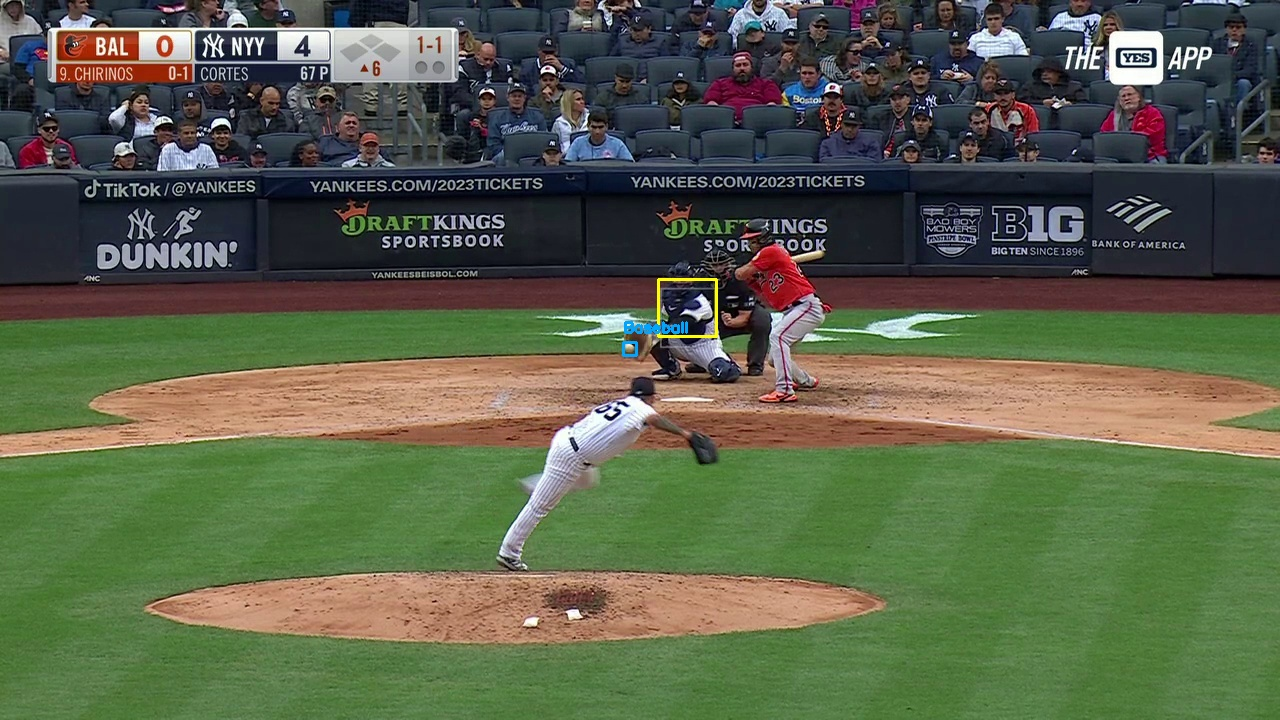


--- Processing: 0009825.jpg ---
Home plate DETECTED.
✅ 'Hitter' class DETECTED by hitter model.
Pose estimated for detected hitter.
Drawing strike zone.
Baseball DETECTED.


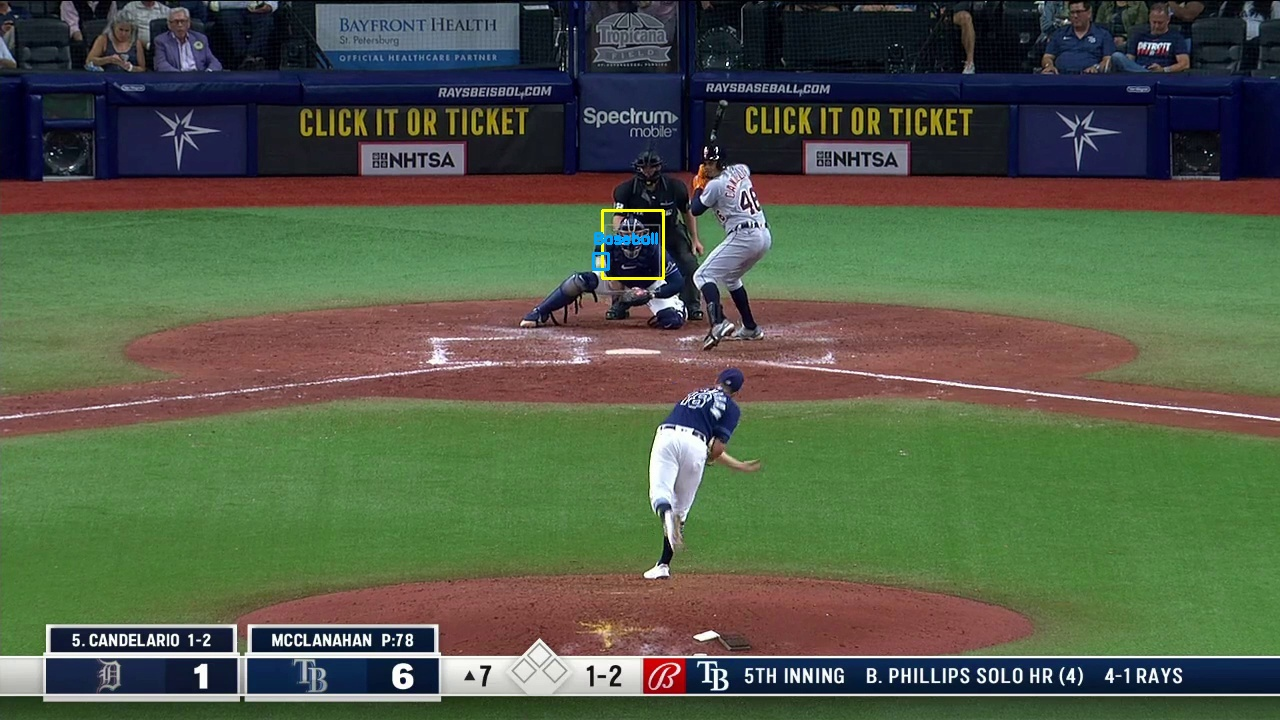


--- Processing: 0005866.jpg ---
Home plate DETECTED.
✅ 'Hitter' class DETECTED by hitter model.
Pose estimated for detected hitter.
Drawing strike zone.
Baseball NOT DETECTED in this frame.


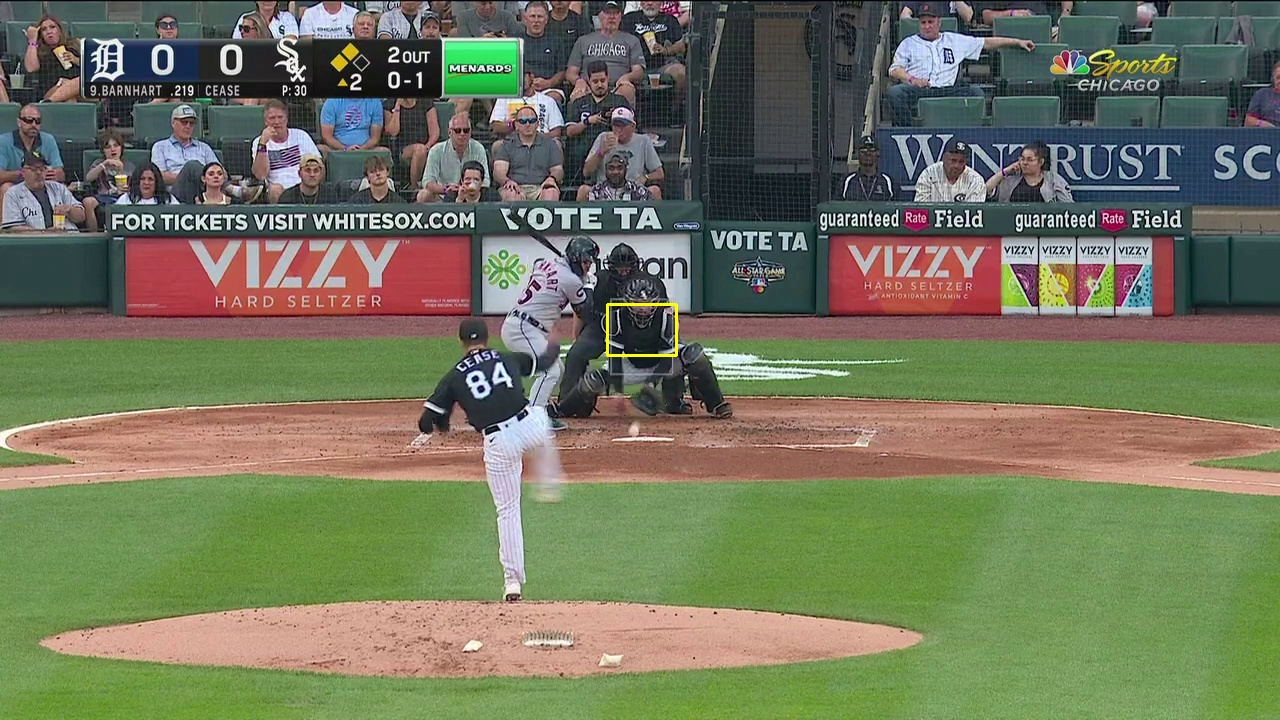


--- Processing: 0004256.jpg ---
Home plate DETECTED.
✅ 'Hitter' class DETECTED by hitter model.
Pose estimated for detected hitter.
Drawing strike zone.
Baseball DETECTED.


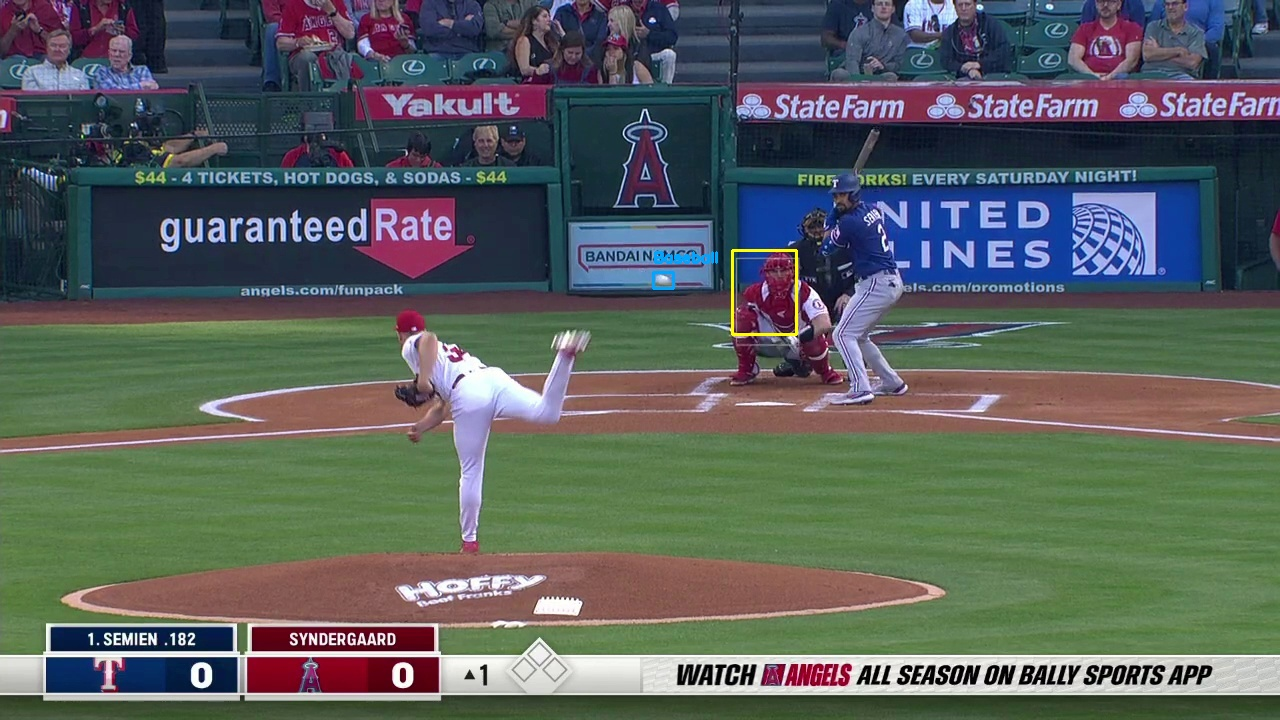


--- Processing: 0006902.jpg ---
Home plate DETECTED.
✅ 'Hitter' class DETECTED by hitter model.
Pose estimated for detected hitter.
Drawing strike zone.
Baseball DETECTED.


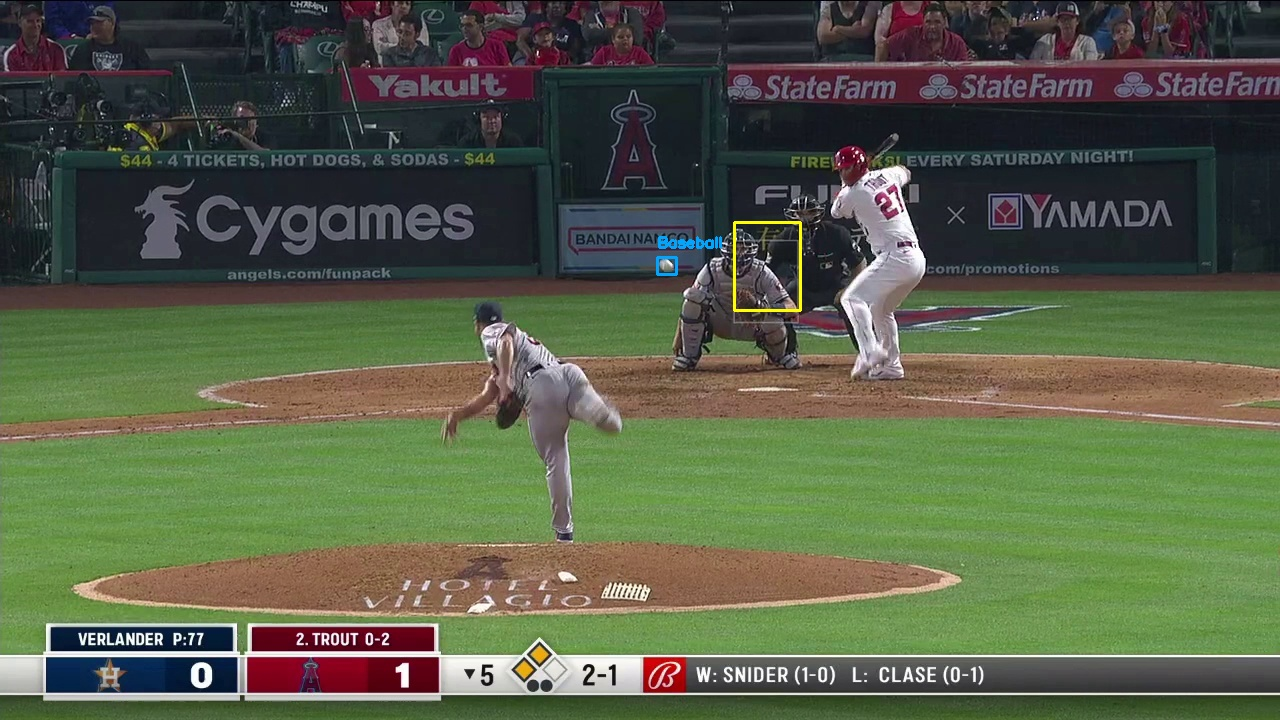


--- Processing: 0004582.jpg ---
Home plate NOT DETECTED by plate model.

--- Processing: 0001229.jpg ---
Home plate DETECTED.
✅ 'Hitter' class DETECTED by hitter model.
Pose estimated for detected hitter.
Drawing strike zone.
Baseball DETECTED.


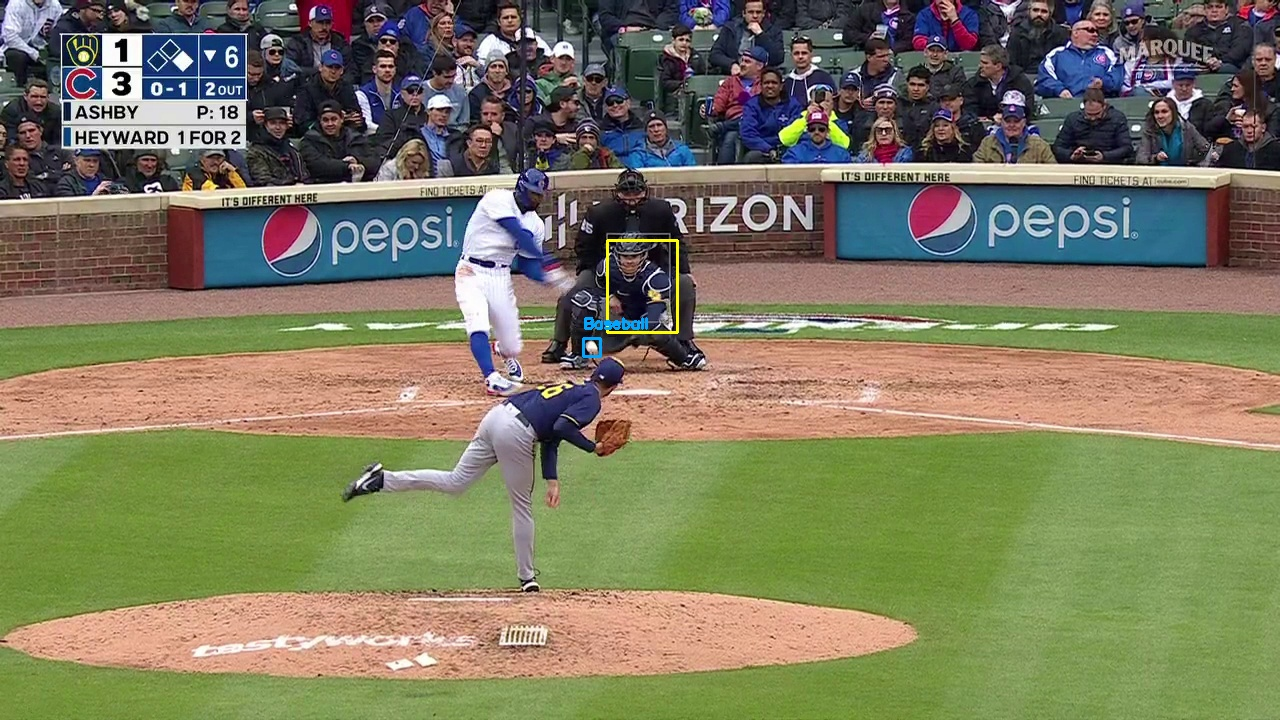


--- Processing: 0008818.jpg ---
Home plate DETECTED.
✅ 'Hitter' class DETECTED by hitter model.
Pose estimated for detected hitter.
Drawing strike zone.
Baseball DETECTED.


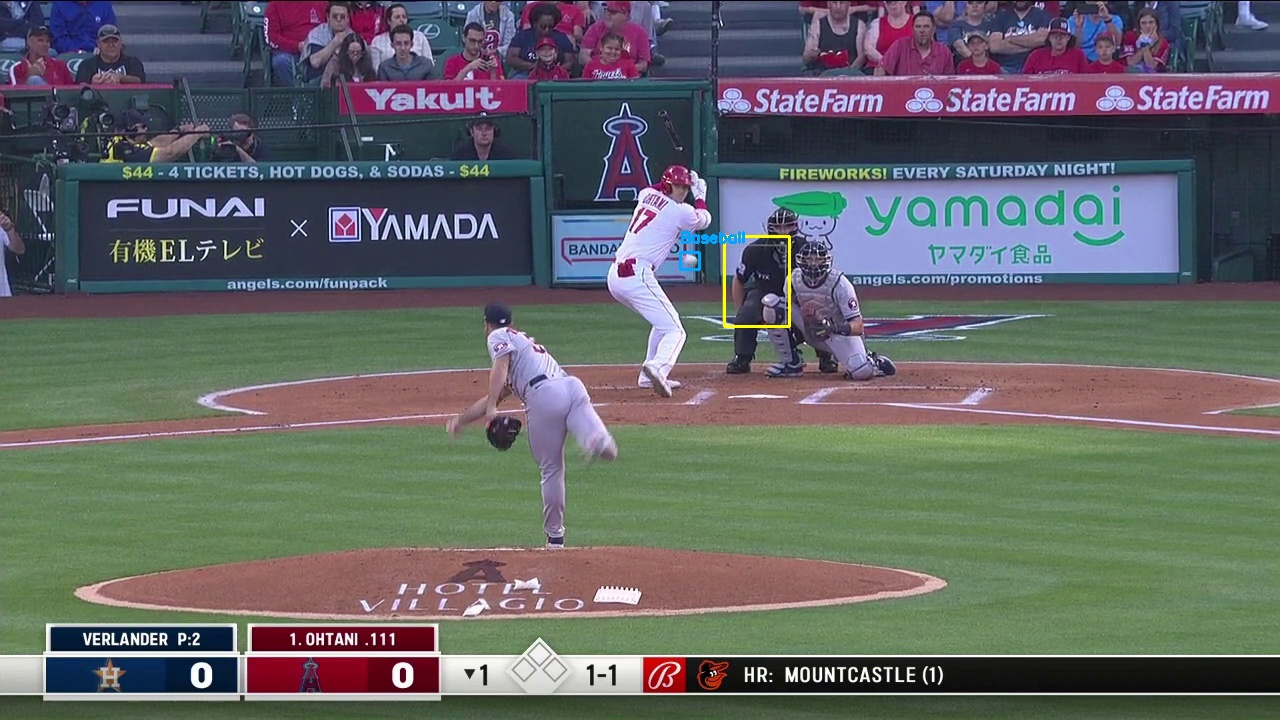


--- Processing: 0002247.jpg ---
Home plate DETECTED.
✅ 'Hitter' class DETECTED by hitter model.
Pose estimated for detected hitter.
Drawing strike zone.
Baseball DETECTED.


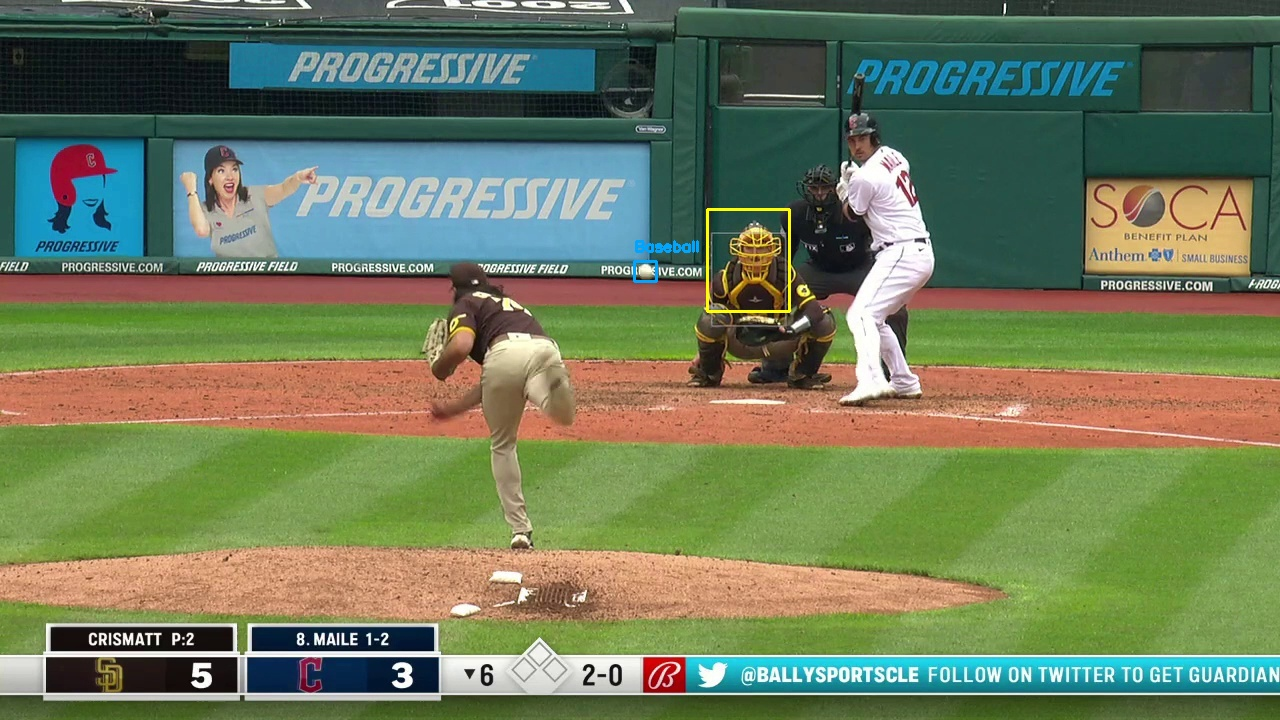

In [11]:
# Final Validation with Three Specialized Models
print("\n--- Running Final Validation with Multi-Model Pipeline ---")
generic_pose_model = YOLO('yolov8n-pose.pt')

# --- Pre Check ---
print("\n--- Pre-Check ---")
plate_model_ready = 'plate_detector_model' in locals() and plate_detector_model is not None
hitter_model_ready = 'hitter_detector_model' in locals() and hitter_detector_model is not None
print(f"Plate Detector Model Loaded: {'PLATE DETECTOR READY' if plate_model_ready else 'ERROR PLATE DETECTOR MODEL NOT LOADED'}")
print(f"Hitter Detector Model Loaded: {'HITTER DETECTOR READY' if hitter_model_ready else 'ERROR HITTER DETECTOR MODEL NOT LOADED'}")

num_test_images = 20
validation_images = []
# Use validation images from the objects dataset as they contain all elements
if 'objects_colab_data' in locals() and objects_colab_data.get('val'):
    val_images_dir = Path(objects_colab_data['val'])
    if val_images_dir.exists():
        validation_images = list(val_images_dir.glob('*.jpg'))[:num_test_images]

images_found = len(validation_images) > 0
print(f"Validation Images Found: {'FOUND' if images_found else 'ERROR'} ({len(validation_images)} images)")
print("------------------------\n")


if plate_model_ready and hitter_model_ready and images_found:
    for image_path in validation_images:
        print(f"\n--- Processing: {image_path.name} ---")
        img = cv2.imread(str(image_path))

        # --- Step 1: Use Plate Detector to find Home Plate and Ball ---
        plate_results = plate_detector_model(img, verbose=False)
        home_plate_box = None
        baseball_box = None # Initialize baseball_box

        for box in plate_results[0].boxes:
            class_name = plate_detector_model.names[int(box.cls[0])]
            if class_name == 'homeplate':
                home_plate_box = box.xyxy[0].cpu().numpy()
            elif class_name == 'baseball':
                baseball_box = box.xyxy[0].cpu().numpy()

        if home_plate_box is not None:
            print("Home plate DETECTED.")
        else:
            print("Home plate NOT DETECTED by plate model.")
            continue

        # --- Step 2: Use Hitter Detector to find the Hitter ---
        hitter_results = hitter_detector_model(img, verbose=False)
        hitter_box = None
        for box in hitter_results[0].boxes:
            if hitter_detector_model.names[int(box.cls[0])] == 'hitter':
                hitter_box = box.xyxy[0].cpu().numpy()
                print("✅ 'Hitter' class DETECTED by hitter model.")
                break

        if hitter_box is None:
            print("❌ 'Hitter' class NOT DETECTED by hitter model. Skipping.")
            continue

        # --- Step 3: Run Generic Pose Model on the Hitter's Bounding Box ---
        x1, y1, x2, y2 = [int(c) for c in hitter_box]
        hitter_crop = img[y1:y2, x1:x2]

        pose_results = generic_pose_model(hitter_crop, verbose=False)
        if not pose_results[0].keypoints or len(pose_results[0].keypoints.xy) == 0:
            print("No pose found within the hitter's bounding box.")
            continue

        # Convert local keypoints from the crop back to global image coordinates
        hitter_keypoints = pose_results[0].keypoints.xy[0].cpu().numpy()
        hitter_keypoints[:, 0] += x1 # Add the crop's x-offset
        hitter_keypoints[:, 1] += y1 # Add the crop's y-offset
        print("Pose estimated for detected hitter.")

        # --- Step 4: Define Strike Zone ---
        strike_zone_left = int(home_plate_box[0])
        strike_zone_right = int(home_plate_box[2])
        plate_top_y = int(home_plate_box[1])

        left_shoulder = hitter_keypoints[5]
        right_shoulder = hitter_keypoints[6]
        left_hip = hitter_keypoints[11]
        right_hip = hitter_keypoints[12]
        left_knee = hitter_keypoints[13]
        right_knee = hitter_keypoints[14]

        shoulder_y = (left_shoulder[1] + right_shoulder[1]) / 2
        hip_y = (left_hip[1] + right_hip[1]) / 2
        strike_zone_top = int((shoulder_y + hip_y) / 2) if shoulder_y > 0 and hip_y > 0 else 0
        strike_zone_bottom = int(max(left_knee[1], right_knee[1])) if left_knee[1] > 0 and right_knee[1] > 0 else 0
        strike_zone_bottom = min(strike_zone_bottom, plate_top_y)

        if strike_zone_bottom > strike_zone_top > 0:
            print("Drawing strike zone.")
            cv2.rectangle(img, (strike_zone_left, strike_zone_top), (strike_zone_right, strike_zone_bottom), (0, 255, 255), 2)
        else:
            print("Invalid keypoints for drawing strike zone.")

        # --- Draw Baseball Bounding Box ---
        if baseball_box is not None:
            print("Baseball DETECTED.")
            b_x1, b_y1, b_x2, b_y2 = [int(c) for c in baseball_box]
            cv2.rectangle(img, (b_x1, b_y1), (b_x2, b_y2), (255, 165, 0), 2) # Orange color for the ball
            cv2.putText(img, 'Baseball', (b_x1, b_y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 165, 0), 2)
        else:
            print("Baseball NOT DETECTED in this frame.")


        # --- Step 5: Visualize and Save ---
        output_val_path = PROJECT_ROOT / f'temp_final_validation_{image_path.name}'
        cv2.imwrite(str(output_val_path), img)
        display(Image(filename=str(output_val_path)))

else:
    print("Could not run validation.")



In [12]:
# Upload Video Files
from google.colab import files
print("--- Please upload your video files ---")
uploaded = files.upload()
video_paths = []
if uploaded:
    video_paths = list(uploaded.keys())
    print(f"Uploaded {len(video_paths)} video(s): {video_paths}")
else:
    print("No videos uploaded.")

--- Please upload your video files ---


Saving 0014.mp4 to 0014.mp4
Saving 0013.mp4 to 0013.mp4
Saving 0012.mp4 to 0012.mp4
Saving 0011.mp4 to 0011.mp4
Saving 0010.mp4 to 0010.mp4
Saving 0009.mp4 to 0009.mp4
Saving 0008.mp4 to 0008.mp4
Saving 0007.mp4 to 0007.mp4
Saving 0006.mp4 to 0006.mp4
Saving 0005.mp4 to 0005.mp4
Saving 0004.mp4 to 0004.mp4
Saving 0003.mp4 to 0003.mp4
Saving 0002.mp4 to 0002.mp4
Saving 0001.mp4 to 0001.mp4
Uploaded 14 video(s): ['0014.mp4', '0013.mp4', '0012.mp4', '0011.mp4', '0010.mp4', '0009.mp4', '0008.mp4', '0007.mp4', '0006.mp4', '0005.mp4', '0004.mp4', '0003.mp4', '0002.mp4', '0001.mp4']




--- Processing video: 0014.mp4 ---
  Processing frame 1...
  ⚾ Ball first detected with high confidence at frame 1. Freezing strike zone...
  Processing frame 2...
  Processing frame 3...
  Processing frame 4...
  Processing frame 5...
  Processing frame 6...
  Processing frame 7...
  Processing frame 8...
  Processing frame 9...
  Processing frame 10...
  Processing frame 11...
  Processing frame 12...
  Processing frame 13...
  Processing frame 14...
  Processing frame 15...
  Processing frame 16...
  Processing frame 17...
  Processing frame 18...
  Processing frame 19...
  Processing frame 20...
  Processing frame 21...
  Processing frame 22...
  Processing frame 23...
  Processing frame 24...
  Processing frame 25...
  Processing frame 26...
  Processing frame 27...
  Processing frame 28...
  Processing frame 29...
  Processing frame 30...
  Processing frame 31...
  Processing frame 32...
  Processing frame 33...
  Processing frame 34...
  Processing frame 35...
  Processing fra

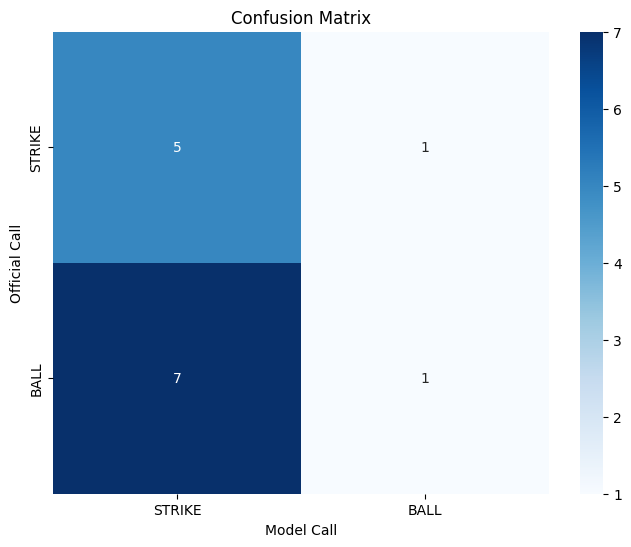

In [14]:
# Process Videos with Bounding Box Intersection Logic

# --- Metadata for the videos ---
video_metadata = {
    '0001.mp4': {'pitcher': 'Cole, Gerrit', 'hitter': 'Ohtani, Shoei', 'count': '0 - 0', 'official_call': 'BALL'},
    '0002.mp4': {'pitcher': 'Cole, Gerrit', 'hitter': 'Ohtani, Shoei', 'count': '0 - 1', 'official_call': 'STRIKE'},
    '0003.mp4': {'pitcher': 'Cole, Gerrit', 'hitter': 'Betts, Mookie', 'count': '0 - 0', 'official_call': 'STRIKE'},
    '0004.mp4': {'pitcher': 'Cole, Gerrit', 'hitter': 'Freeman, Freddie', 'count': '0 - 0', 'official_call': 'BALL'},
    '0005.mp4': {'pitcher': 'Cole, Gerrit', 'hitter': 'Freeman, Freddie', 'count': '1 - 1', 'official_call': 'BALL'},
    '0006.mp4': {'pitcher': 'Cole, Gerrit', 'hitter': 'Freeman, Freddie', 'count': '2 - 1', 'official_call': 'BALL'},
    '0007.mp4': {'pitcher': 'Cole, Gerrit', 'hitter': 'Freeman, Freddie', 'count': '3 - 1', 'official_call': 'BALL'},
    '0008.mp4': {'pitcher': 'Ohtani, Shoei', 'hitter': 'Tatis Jr., Fernando', 'count': '0 - 1', 'official_call': 'BALL'},
    '0009.mp4': {'pitcher': 'Ohtani, Shoei', 'hitter': 'Tatis Jr., Fernando', 'count': '1 - 1', 'official_call': 'BALL'},
    '0010.mp4': {'pitcher': 'Ohtani, Shoei', 'hitter': 'Tatis Jr., Fernando', 'count': '2 - 1', 'official_call': 'BALL'},
    '0011.mp4': {'pitcher': 'Ohtani, Shoei', 'hitter': 'Arraez, Luis', 'count': '2 - 1', 'official_call': 'STRIKE'},
    '0012.mp4': {'pitcher': 'Ohtani, Shoei', 'hitter': 'Sheets, Gavin', 'count': '0 - 1', 'official_call': 'STRIKE'},
    '0013.mp4': {'pitcher': 'Ohtani, Shoei', 'hitter': 'Bogaerts, Xander', 'count': '0 - 0', 'official_call': 'STRIKE'},
    '0014.mp4': {'pitcher': 'Ohtani, Shoei', 'hitter': 'Wood, James', 'count': '0 - 0', 'official_call': 'STRIKE'},
}
final_results = []

def boxes_intersect(boxA, boxB):
    """Checks if two bounding boxes intersect."""
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    return xB > xA and yB > yA

if video_paths and plate_detector_model and hitter_detector_model:
    generic_pose_model = YOLO('yolov8n-pose.pt')

    for video_path in video_paths:
        if video_path not in video_metadata:
            print(f"\n--- Skipping video: {video_path} (no metadata found) ---")
            continue

        print(f"\n\n--- Processing video: {video_path} ---")

        cap = cv2.VideoCapture(video_path)
        width, height, fps = (int(cap.get(c)) for c in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))

        input_video_name = Path(video_path).stem
        output_video_path = PROJECT_ROOT / f'{input_video_name}_output.mp4'
        out = cv2.VideoWriter(str(output_video_path), cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

        frozen_strike_zone = None
        ball_trajectory_boxes = []
        tracking_active = False
        frame_count = 0

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret: break
            frame_count += 1
            print(f"  Processing frame {frame_count}...")

            plate_results = plate_detector_model(frame, verbose=False)
            ball_box_obj = next((box for box in plate_results[0].boxes if plate_detector_model.names[int(box.cls[0])] == 'baseball'), None)

            if not tracking_active and ball_box_obj and ball_box_obj.conf[0] > 0.50:
                tracking_active = True
                print(f"  ⚾ Ball first detected with high confidence at frame {frame_count}. Freezing strike zone...")

                hitter_results = hitter_detector_model(frame, verbose=False)
                home_plate_box = next((b.xyxy[0].cpu().numpy() for b in plate_results[0].boxes if plate_detector_model.names[int(b.cls[0])] == 'homeplate'), None)
                hitter_box = next((b.xyxy[0].cpu().numpy() for b in hitter_results[0].boxes if hitter_detector_model.names[int(b.cls[0])] == 'hitter'), None)

                if home_plate_box is not None and hitter_box is not None:
                    x1_h, y1_h, x2_h, y2_h = [int(c) for c in hitter_box]
                    hitter_crop = frame[y1_h:y2_h, x1_h:x2_h]
                    pose_results = generic_pose_model(hitter_crop, verbose=False)
                    if pose_results[0].keypoints:
                        hitter_keypoints = pose_results[0].keypoints.xy[0].cpu().numpy()
                        hitter_keypoints[:, 0] += x1_h; hitter_keypoints[:, 1] += y1_h
                        sz_left = int(home_plate_box[0]); sz_right = int(home_plate_box[2])
                        plate_top_y = int(home_plate_box[1])
                        shoulder_y = (hitter_keypoints[5][1] + hitter_keypoints[6][1]) / 2
                        hip_y = (hitter_keypoints[11][1] + hitter_keypoints[12][1]) / 2
                        sz_top = int((shoulder_y + hip_y) / 2)
                        sz_bottom = int(max(hitter_keypoints[13][1], hitter_keypoints[14][1]))
                        sz_bottom = min(sz_bottom, plate_top_y)
                        if sz_bottom > sz_top > 0:
                            frozen_strike_zone = (sz_left, sz_top, sz_right, sz_bottom)
                            print(f"  ✅ Strike Zone FROZEN: {frozen_strike_zone}")

            if tracking_active:
                if ball_box_obj:
                    ball_trajectory_boxes.append(ball_box_obj.xyxy[0].cpu().numpy())

                glove_box = next((box.xyxy[0].cpu().numpy() for box in plate_results[0].boxes if plate_detector_model.names[int(box.cls[0])] == 'glove'), None)
                if ball_box_obj is not None and glove_box is not None and boxes_intersect(ball_box_obj.xyxy[0].cpu().numpy(), glove_box):
                    print(f"  🧤 Ball entered glove at frame {frame_count}. Stopping trajectory.")
                    tracking_active = False

            if frozen_strike_zone:
                cv2.rectangle(frame, (frozen_strike_zone[0], frozen_strike_zone[1]), (frozen_strike_zone[2], frozen_strike_zone[3]), (0, 255, 255), 2)

            # Draw trajectory from centers of boxes
            if len(ball_trajectory_boxes) > 1:
                centers = [((int(box[0]+box[2])//2), int((box[1]+box[3])//2)) for box in ball_trajectory_boxes]
                cv2.polylines(frame, [np.array(centers, np.int32)], isClosed=False, color=(255, 0, 0), thickness=2)
            out.write(frame)

        # --- Make and store the final call ---
        final_call_text = "INCONCLUSIVE"
        is_strike = False
        if frozen_strike_zone and ball_trajectory_boxes:
            sz_left, sz_top, sz_right, sz_bottom = frozen_strike_zone
            strike_zone_rect = (sz_left, sz_top, sz_right, sz_bottom)
            for ball_box in ball_trajectory_boxes:
                if boxes_intersect(ball_box, strike_zone_rect):
                    is_strike = True
                    break
            final_call_text = "STRIKE" if is_strike else "BALL"

        current_video_info = video_metadata[video_path]
        current_video_info['model_call'] = final_call_text
        current_video_info['filename'] = Path(video_path).name
        final_results.append(current_video_info)

        cap.release()
        out.release()
        print(f"\n✅ Video processing complete for '{video_path}'. Output saved to: {output_video_path}")

    # --- Print the final summary table ---
    final_results.sort(key=lambda x: x['filename'])
    print("\n\n--- FINAL RESULTS SUMMARY ---")
    print("\nFINAL SERIES 2024")
    for res in final_results:
        filename = res['filename']
        if int(Path(filename).stem) <= 7:
             print(f"{filename} Pitcher: {res['pitcher']:<20} | Hitter: {res['hitter']:<20} | Count: {res['count']:<5} | Official Call: {res['official_call']:<7} | Model Call: {res['model_call']}")

    print("\nOHTANI RETURN")
    for res in final_results:
        filename = res['filename']
        if int(Path(filename).stem) > 7:
             print(f"{filename} Pitcher: {res['pitcher']:<20} | Hitter: {res['hitter']:<20} | Count: {res['count']:<5} | Official Call: {res['official_call']:<7} | Model Call: {res['model_call']}")

    # --- Calculate and Print Performance Metrics ---
    y_true = [res['official_call'] for res in final_results]
    y_pred = [res['model_call'].split(' ')[0] for res in final_results]

    if y_true and y_pred:
        tp, fp, tn, fn = 0, 0, 0, 0
        for official, model in zip(y_true, y_pred):
            if model == "STRIKE" and official == "STRIKE": tp += 1
            elif model == "STRIKE" and official == "BALL": fp += 1
            elif model == "BALL" and official == "BALL": tn += 1
            elif model == "BALL" and official == "STRIKE": fn += 1

        total_calls = len(final_results)
        accuracy = (tp + tn) / total_calls if total_calls > 0 else 0
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        print("\n\n--- PERFORMANCE METRICS ---")
        print(f"Total Pitches Analyzed: {total_calls}")
        print(f"Accuracy:  {accuracy:.2%}")
        print(f"Precision: {precision:.2%}")
        print(f"Recall:    {recall:.2%}")
        print(f"F1-Score:  {f1_score:.2%}")
        print("--------------------------")

        # --- Plot Confusion Matrix ---
        cm = confusion_matrix(y_true, y_pred, labels=["STRIKE", "BALL"])
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=["STRIKE", "BALL"], yticklabels=["STRIKE", "BALL"])
        plt.xlabel('Model Call')
        plt.ylabel('Official Call')
        plt.title('Confusion Matrix')
        plt.show()

else:
    print("Could not run video processing.")


In [16]:
# Definisci il nome del file zip finale
nome_file_zip = '_vision.vFinale'
# Definisci la cartella dove salvare temporaneamente i file da zippare
cartella_da_zippare = 'export_progetto'

# Crea la cartella di esportazione se non esiste
if os.path.exists(cartella_da_zippare):
    shutil.rmtree(cartella_da_zippare)
os.makedirs(cartella_da_zippare)

print(f"Cartella '{cartella_da_zippare}' creata.")

# --- Copia i modelli addestrati ---
percorso_runs = '/content/runs'
if os.path.exists(percorso_runs):
    shutil.copytree(percorso_runs, os.path.join(cartella_da_zippare, 'runs'))
    print("Cartella 'runs' con i modelli addestrati copiata.")

# --- Copia i video di output e le immagini finali ---
for file in os.listdir('/content'):
    if file.endswith('_output.mp4') or file.startswith('temp_final_validation_'):
        shutil.copy(os.path.join('/content', file), cartella_da_zippare)
print("Video di output e immagini di validazione copiati.")

# --- Copia il notebook stesso ---
# Assicurati che il nome del notebook sia corretto
nome_notebook = 'vision_project_notebook_setup.ipynb' # Cambia se il tuo notebook ha un nome diverso
if os.path.exists(f'/content/{nome_notebook}'):
    shutil.copy(f'/content/{nome_notebook}', cartella_da_zippare)
    print(f"Notebook '{nome_notebook}' copiato.")


# --- Crea il file zip ---
shutil.make_archive(nome_file_zip, 'zip', cartella_da_zippare)

print(f"\n Creato il file '{nome_file_zip}.zip' con tutti i risultati!")

Cartella 'export_progetto' creata.
Cartella 'runs' con i modelli addestrati copiata.
Video di output e immagini di validazione copiati.

 Creato il file '_vision.vFinale.zip' con tutti i risultati!
